In [ ]:
import kagglehub
carrie1_ecommerce_data_path = kagglehub.dataset_download('carrie1/ecommerce-data')

print('Data source import complete.')


Data source import complete.


# Object
- E-Commerce performance Analysis

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing data
url = '/kaggle/input/ecommerce-data/data.csv'
data = pd.read_csv(url, index_col=0, encoding='ISO-8859-1')
data.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Check datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 536365 to 581587
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    541909 non-null  object 
 1   Description  540455 non-null  object 
 2   Quantity     541909 non-null  int64  
 3   InvoiceDate  541909 non-null  object 
 4   UnitPrice    541909 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Check null values
data.isnull().sum().sort_values(ascending = False)

,0
CustomerID,135080
Description,1454
StockCode,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


In [ ]:
# Check duplicated values
print(str(sum(data.duplicated())))

5848


In [ ]:
# Describe
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.55,218.08,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.61,96.76,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.69,1713.60,12346.00,13953.00,15152.00,16791.00,18287.0


In [ ]:
# Data processing
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Month'] = data['InvoiceDate'].dt.month
data['Sales'] = data['Quantity']*data['UnitPrice']
data['Status'] = np.where(data['Quantity'] > 0, 'Success', 'Return')

In [ ]:
print('Data min:',data['InvoiceDate'].min())
print('Data max:',data['InvoiceDate'].max())

Data min: 2010-12-01 08:26:00
Data max: 2011-12-09 12:50:00


# Analysis

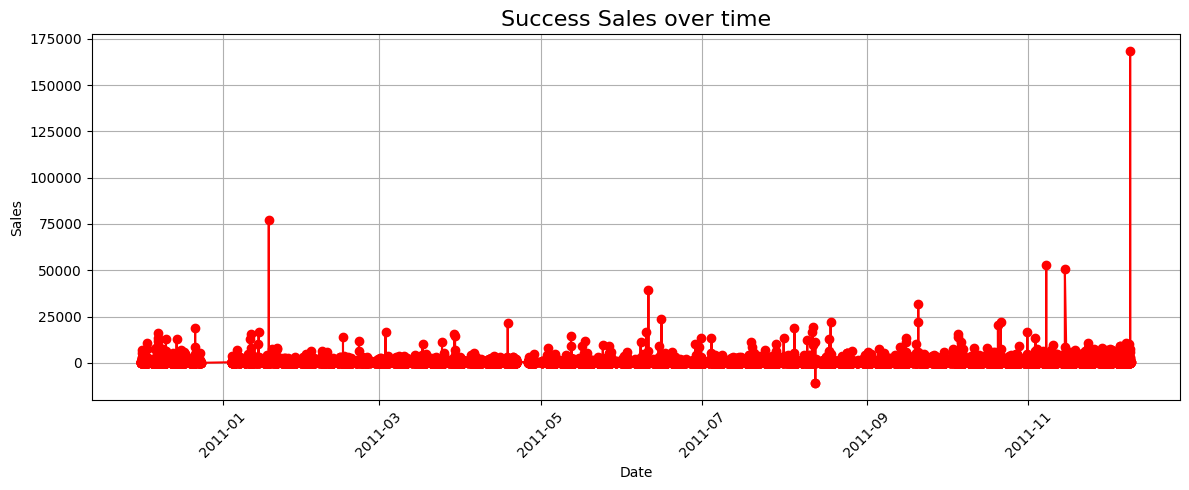

In [ ]:
# Success sales over time
df1 = data[data['Status']=='Success'].groupby('InvoiceDate')['Sales'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(df1['InvoiceDate'],df1['Sales'], marker='o',linestyle='-',color='red')
plt.title('Success Sales over time', fontsize = 16)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

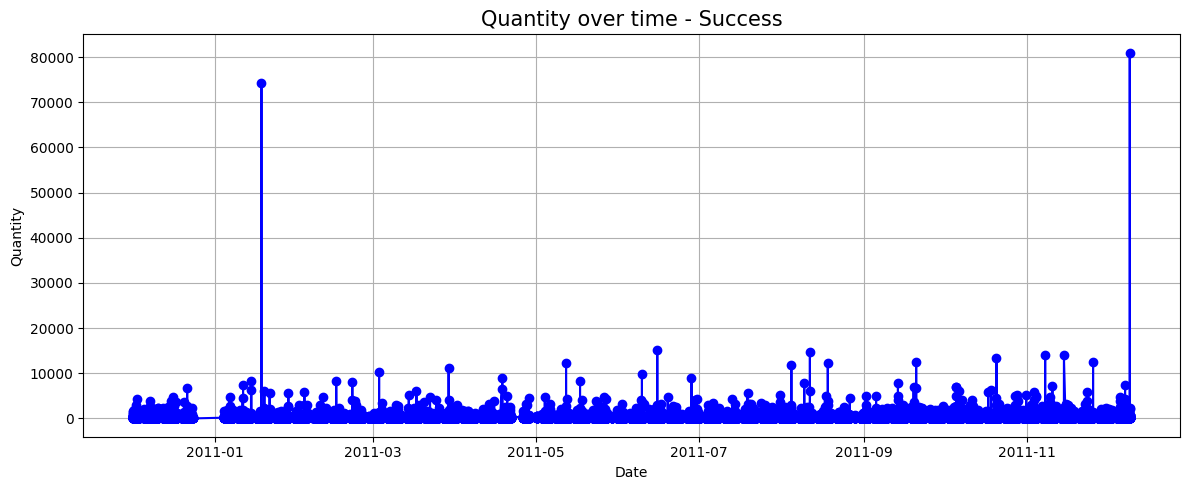

In [ ]:
# Quantity over time (Success)
df12 = data[data['Status']=='Success'].groupby('InvoiceDate')['Quantity'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(df12['InvoiceDate'],df12['Quantity'], marker='o', linestyle='-', color = 'blue')
plt.title('Quantity over time - Success', fontsize = 15)
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation = 0)
plt.grid(True)
plt.tight_layout()
plt.show()

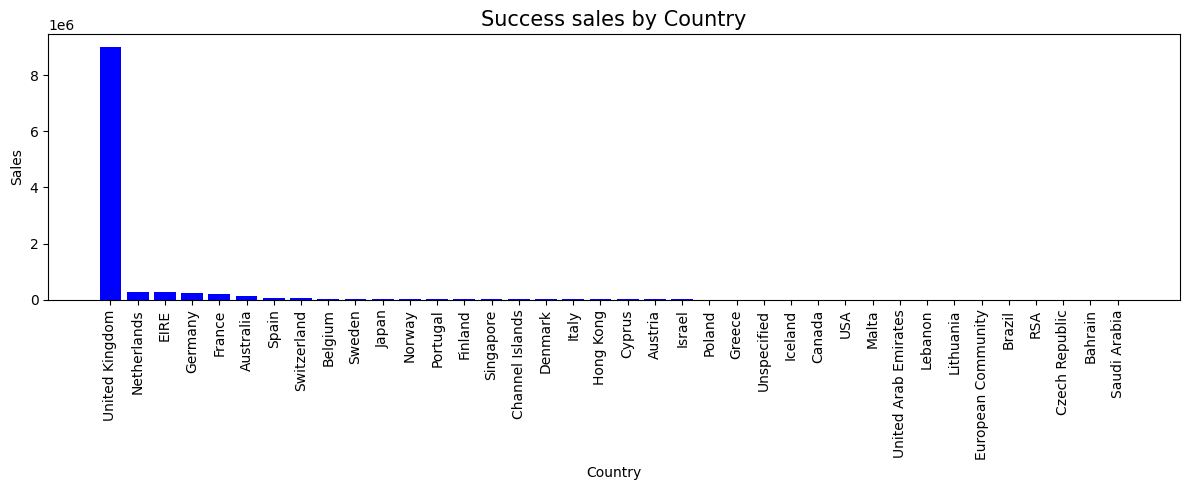

In [ ]:
# Sales by country (Success)
df11 = data[data['Status']=='Success'].groupby('Country')['Sales'].sum().sort_values(ascending = False).reset_index()

plt.figure(figsize=(12,5))
plt.bar(df11['Country'],df11['Sales'], color = 'blue')
plt.title('Success sales by Country', fontsize = 15)
plt.xlabel('Country')
plt.ylabel('Sales')
plt.xticks(rotation = 90)
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# Number of country
data['Country'].nunique()

38

### Summary
Observation:
- Sales revenue and sales volume tend to increase in the last six months of the year, especially from August to December.

- The trend of sales revenue and sales volume shows a positive linear relationship, meaning that as sales volume increases, revenue also rises.

- The company had a presence in 38 countries, but in 2011, sales primarily came from the UK market.

Insight:
- Because the company mainly sells unique all-occasion gifts. So, this is a seasonal effect (e.g., Thanksgiving, Black Friday, Christmas, New Year’s Day) and online shopping demand is typically higher at the end of the year.
- Despite having a presence in 38 countries, the company remains heavily reliant on its domestic market. This indicates underperformance or limited market penetration in international markets, suggesting that the company’s growth strategy is still predominantly domestic-focused.

Recommendation:
- Increase marketing budgets and stock levels for peak months; focus on best-selling products during the year-end season.
- Recommendation about Market Expansion Strategy:
1. Market Prioritization: Identify and prioritize high-potential international markets using data-driven market analysis (e.g., market size, growth rate, competitive landscape).

2. Localized Strategies: Adapt product offerings, pricing, and marketing campaigns to fit local customer preferences and cultural nuances.

3. Partnership & Distribution: Build strategic partnerships with local distributors, e-commerce platforms, or retailers to accelerate market penetration.

4. Brand Awareness Campaigns: Invest in targeted brand awareness initiatives in selected international markets to strengthen brand recognition.

5. Performance Tracking: Set clear KPIs for each market (revenue share, customer acquisition cost, retention rate) to evaluate and refine expansion strategies.

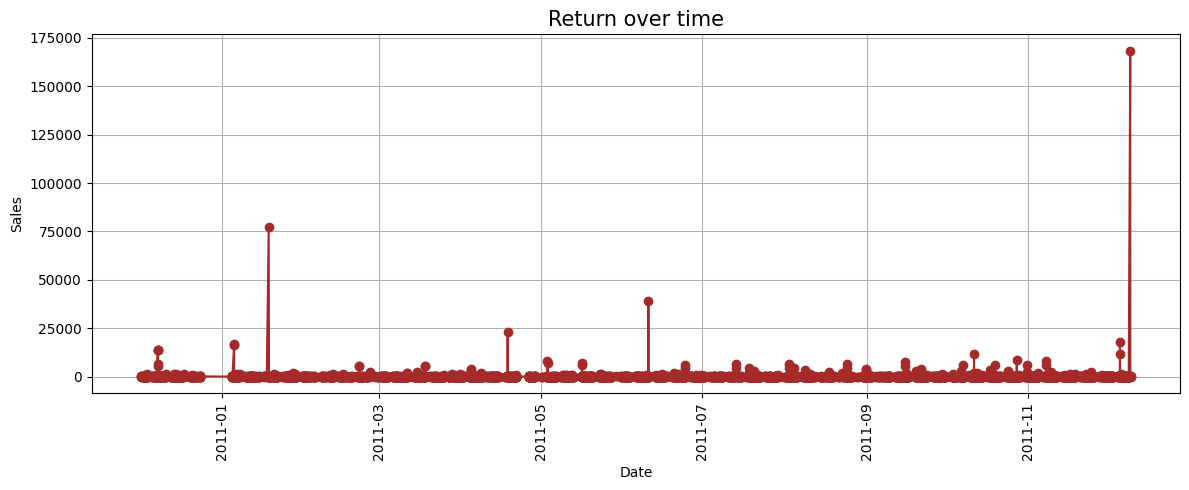

In [ ]:
# Return
df2 = data[data['Status']=='Return'].groupby('InvoiceDate')['Sales'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(df2['InvoiceDate'],df2['Sales']*(-1), marker = 'o', linestyle = '-', color = 'brown')
plt.title('Return over time', fontsize = 15)
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Sales', fontsize = 10)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


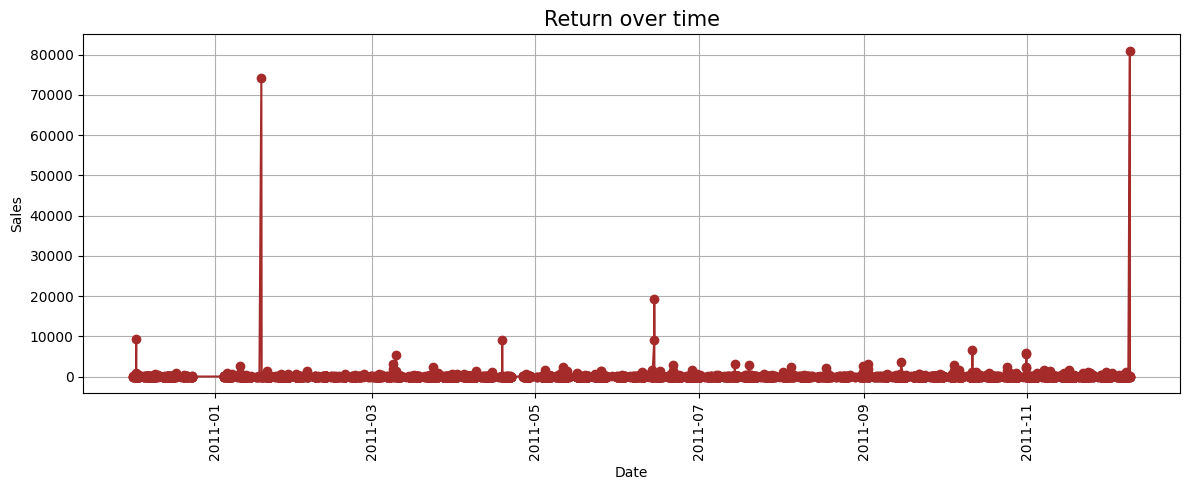

In [ ]:
df21 = data[data['Status']=='Return'].groupby('InvoiceDate')['Quantity'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(df21['InvoiceDate'],df21['Quantity']*(-1), marker = 'o', linestyle = '-', color = 'brown')
plt.title('Return over time', fontsize = 15)
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Sales', fontsize = 10)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

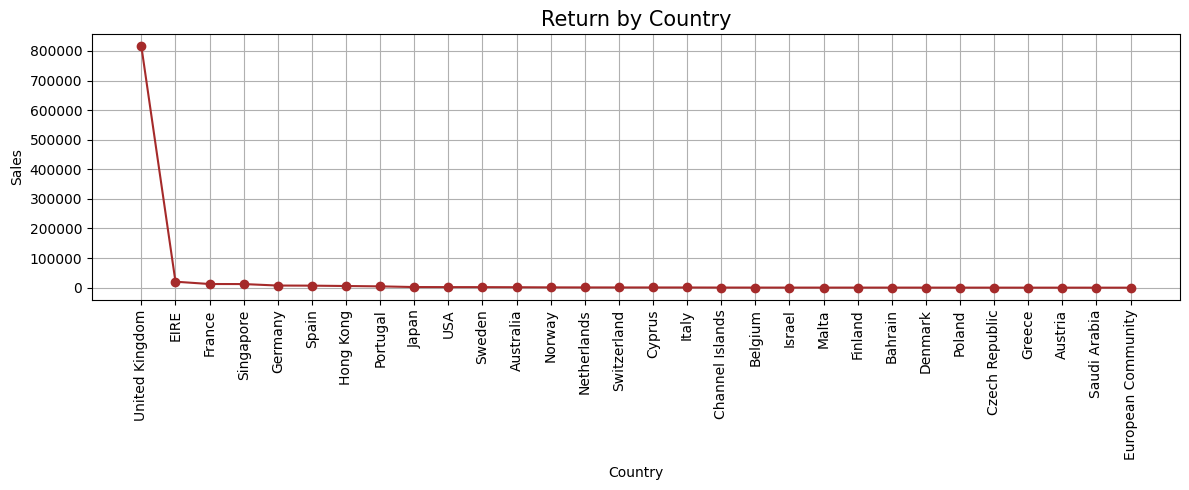

In [ ]:
df22 = data[data['Status']=='Return'].groupby('Country')['Sales'].sum().sort_values(ascending = True).reset_index()

plt.figure(figsize=(12,5))
plt.plot(df22['Country'],df22['Sales']*(-1), marker = 'o', linestyle = '-', color = 'brown')
plt.title('Return by Country', fontsize = 15)
plt.xlabel('Country', fontsize = 10)
plt.ylabel('Sales', fontsize = 10)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

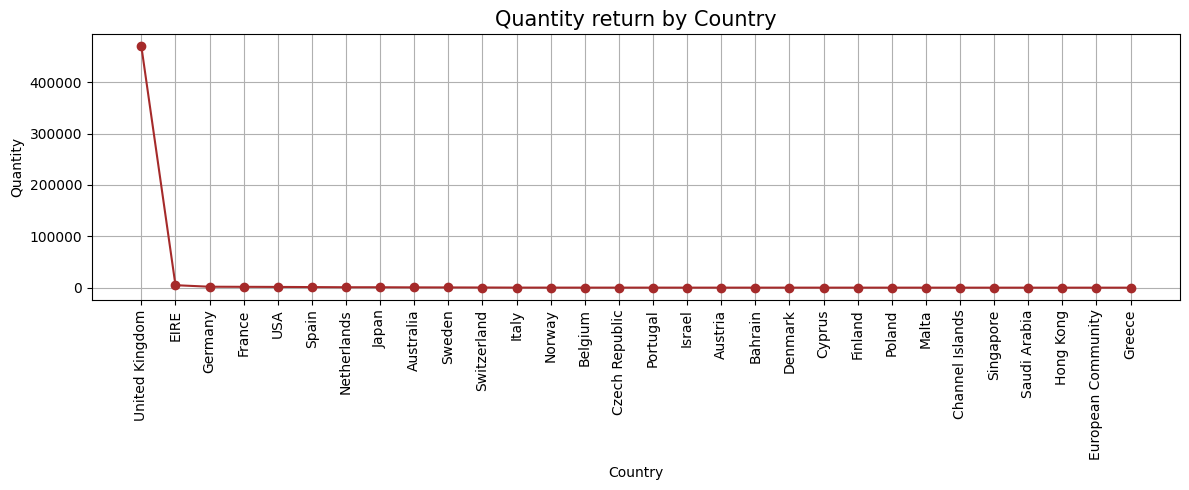

In [ ]:
df23 = data[data['Status']=='Return'].groupby('Country')['Quantity'].sum().sort_values(ascending = True).reset_index()

plt.figure(figsize=(12,5))
plt.plot(df23['Country'],df23['Quantity']*(-1), marker = 'o', linestyle = '-', color = 'brown')
plt.title('Quantity return by Country', fontsize = 15)
plt.xlabel('Country', fontsize = 10)
plt.ylabel('Quantity', fontsize = 10)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

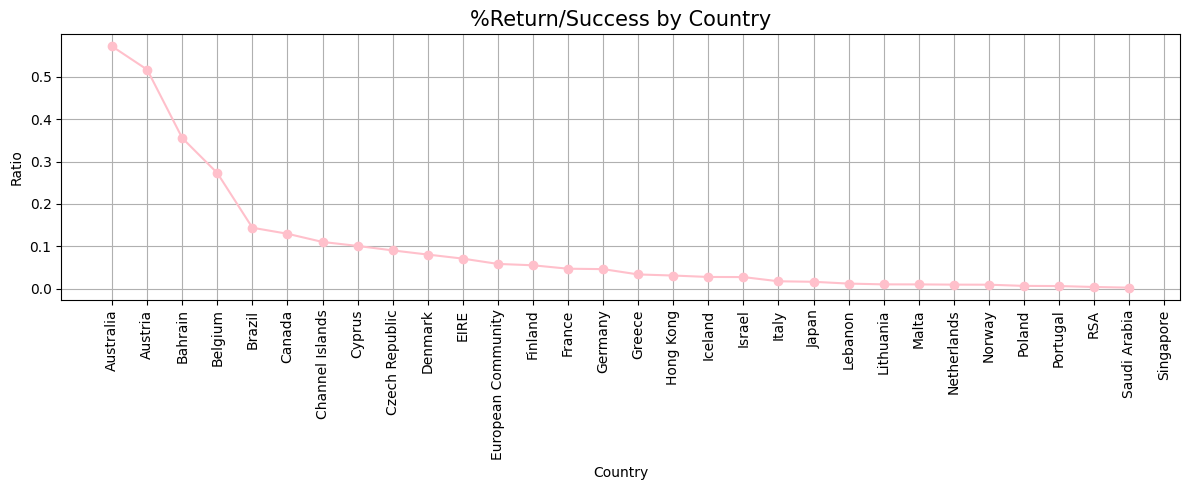

In [ ]:
# % Return/Success
df3 = data.groupby(['Country','Status'])['Sales'].sum().unstack()
df3['%Return/Success'] = df3['Return'].abs()/df3['Success']

plt.figure(figsize=(12,5))
plt.plot(df3.index,df3['%Return/Success'].sort_values(ascending=False), marker = 'o', linestyle='-', color = 'pink')
plt.title('%Return/Success by Country', fontsize = 15)
plt.xlabel('Country')
plt.ylabel('Ratio')
plt.xticks(rotation = 90)
plt.grid(True)
plt.tight_layout()
plt.show()

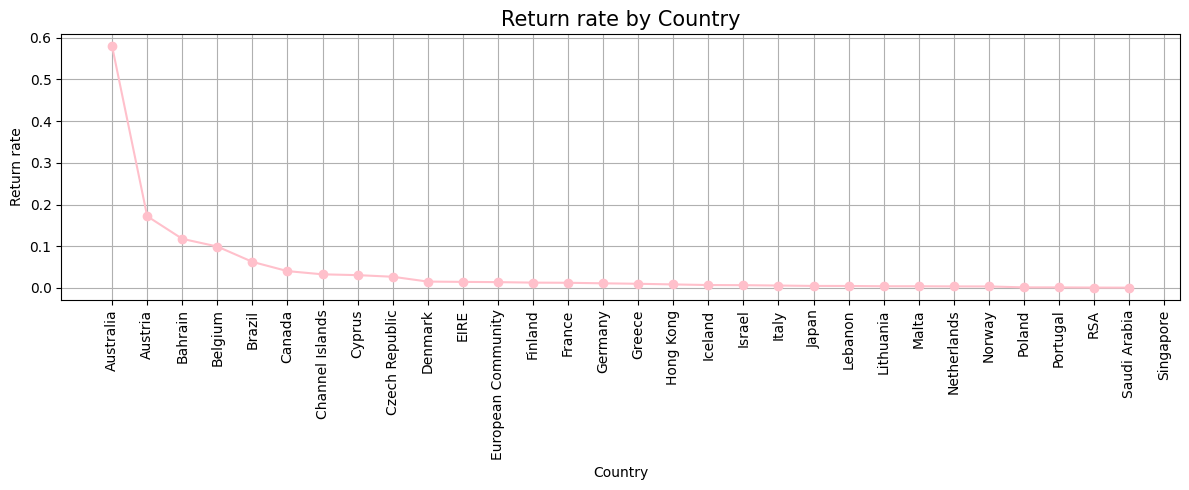

In [ ]:
# % Return rate by Country
df4 = data.groupby(['Country','Status'])['Quantity'].sum().unstack()
df4['Return rate'] = df4['Return'].abs()/df4['Success']

plt.figure(figsize=(12,5))
plt.plot(df4.index,df4['Return rate'].sort_values(ascending=False), marker = 'o', linestyle='-', color = 'pink')
plt.title('Return rate by Country', fontsize = 15)
plt.xlabel('Country')
plt.ylabel('Return rate')
plt.xticks(rotation = 90)
plt.grid(True)
plt.tight_layout()
plt.show()

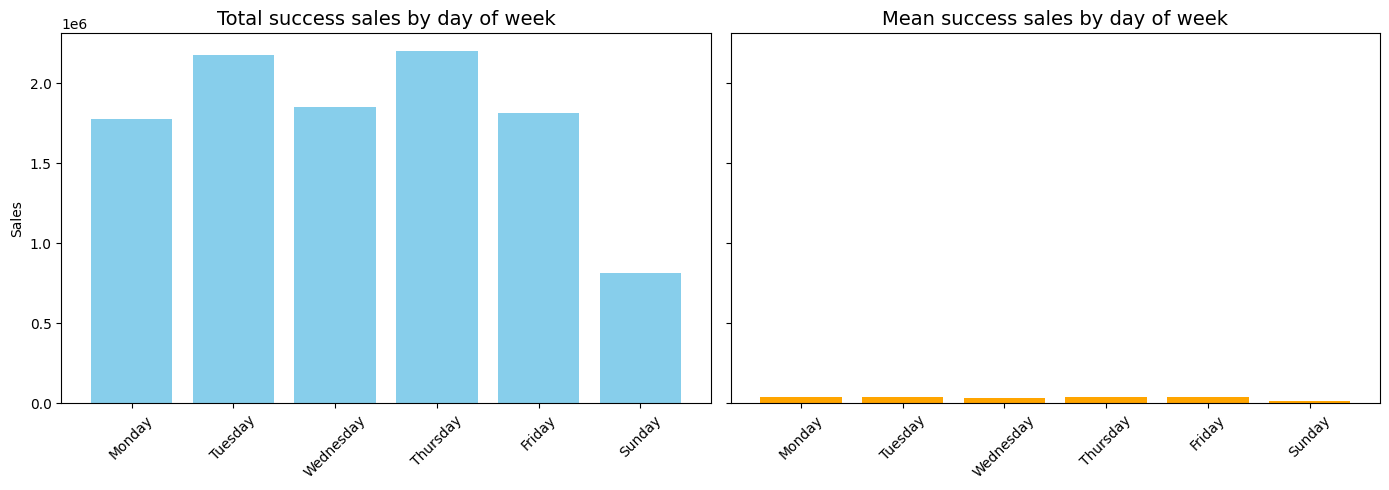

In [ ]:
# Behavior of customer
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()
data['Week'] = data['InvoiceDate'].dt.isocalendar().week

# 1. Success sales by day of week
sales_sum = data[data['Status']=='Success'].groupby('DayOfWeek')['Sales'].sum()

# 2. Mean success sales by day of week
weekly_avg = (
    data[data['Status']=='Success'].groupby(['Week','DayOfWeek'])['Sales'].sum()
    .groupby('DayOfWeek').mean()
)

# Sort values day of week
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# keep day of week have data
order_existing = [day for day in order if day in sales_sum.index]

sales_sum = sales_sum[order_existing]
weekly_avg = weekly_avg[order_existing]

# draw chart
fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

# Chart sum
axes[0].bar(sales_sum.index, sales_sum.values, color='skyblue')
axes[0].set_title('Total success sales by day of week', fontsize=14)
axes[0].set_ylabel('Sales')
axes[0].tick_params(axis='x', rotation=45)

# Chart mean
axes[1].bar(weekly_avg.index, weekly_avg.values, color='orange')
axes[1].set_title('Mean success sales by day of week', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## RFM Analysis


In [ ]:
import datetime as dt

# Calculate Recency
latest_date = dt.datetime(2011, 12, 10)
recency_df = data.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['Recency'] = (latest_date - recency_df['InvoiceDate']).dt.days

# Calculate Frequency
# Access the InvoiceNo column from the original data before setting it as the index
frequency_df = data.reset_index().groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

# Calculate Monetary
monetary_df = data.groupby('CustomerID')['Sales'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']

# Merge RFM metrics
rfm_df = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID')

display(rfm_df.head())

,CustomerID,InvoiceDate,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:17:00,325,2,0.00
1,12347.0,2011-12-07 15:52:00,2,7,4310.00
2,12348.0,2011-09-25 13:13:00,75,4,1797.24
3,12349.0,2011-11-21 09:51:00,18,1,1757.55
4,12350.0,2011-02-02 16:01:00,310,1,334.40


## Product Performance Analysis

Analyzing product performance can help identify best-selling and most returned items, which can inform inventory management and marketing strategies.

In [ ]:
# Best-selling products by quantity
product_quantity = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).reset_index()
display(product_quantity.head())

# Best-selling products by sales
product_sales = data.groupby('Description')['Sales'].sum().sort_values(ascending=False).reset_index()
display(product_sales.head())

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1,JUMBO BAG RED RETROSPOT,47363
2,ASSORTED COLOUR BIRD ORNAMENT,36381
3,POPCORN HOLDER,36334
4,PACK OF 72 RETROSPOT CAKE CASES,36039


,Description,Sales
0,DOTCOM POSTAGE,206245.48
1,REGENCY CAKESTAND 3 TIER,164762.19
2,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
3,PARTY BUNTING,98302.98
4,JUMBO BAG RED RETROSPOT,92356.03


### Visualizing RFM Segments

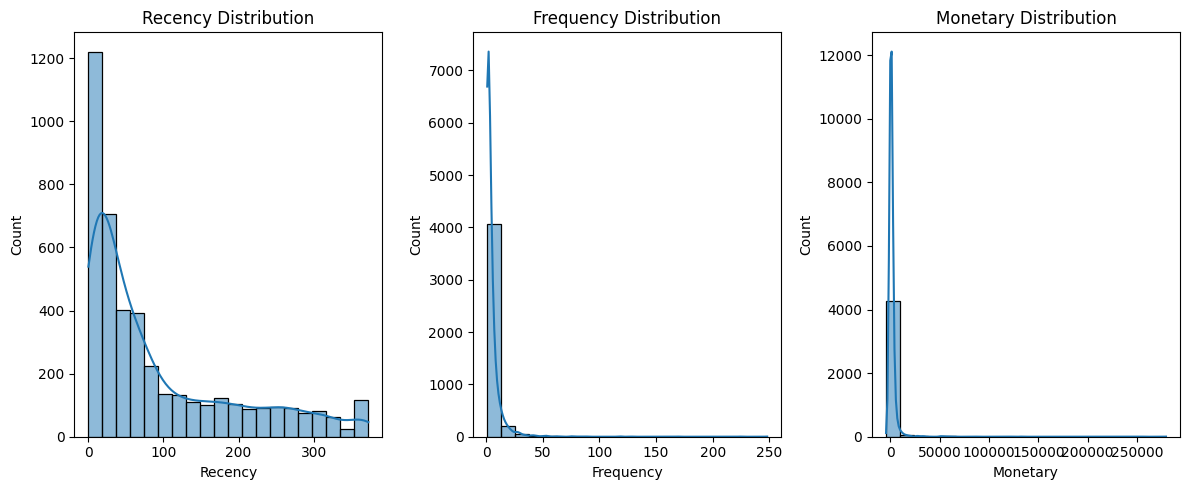

In [ ]:
# Visualize the distribution of customers across different RFM segments
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.histplot(rfm_df['Recency'], bins=20, kde=True)
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.histplot(rfm_df['Frequency'], bins=20, kde=True)
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.histplot(rfm_df['Monetary'], bins=20, kde=True)
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

### Visualizing Product Performance

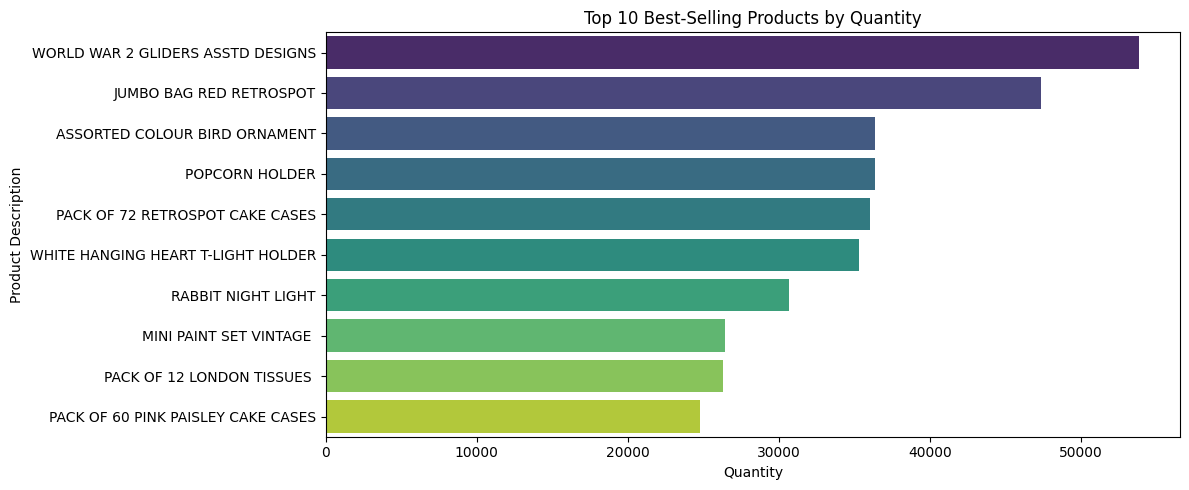

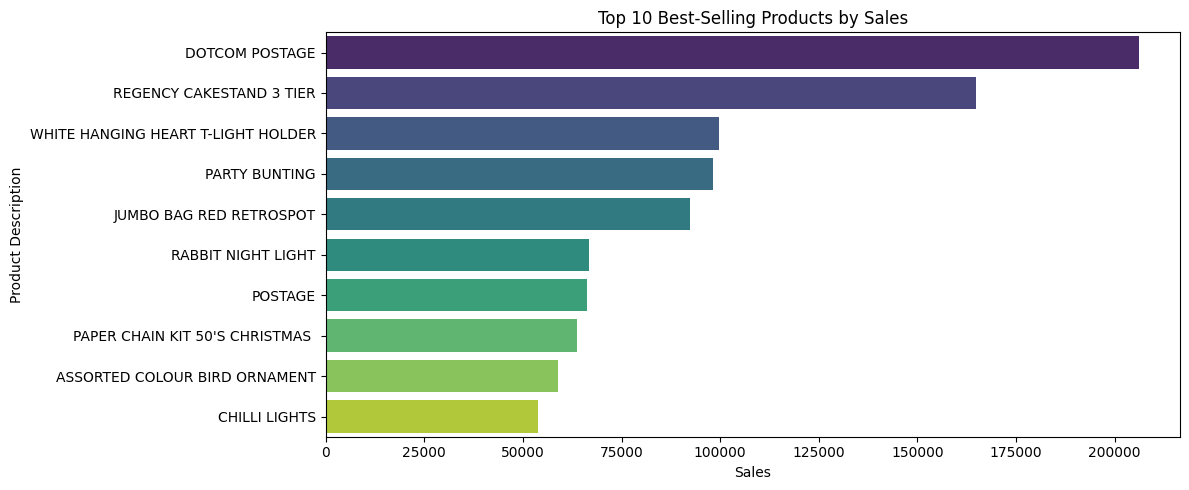

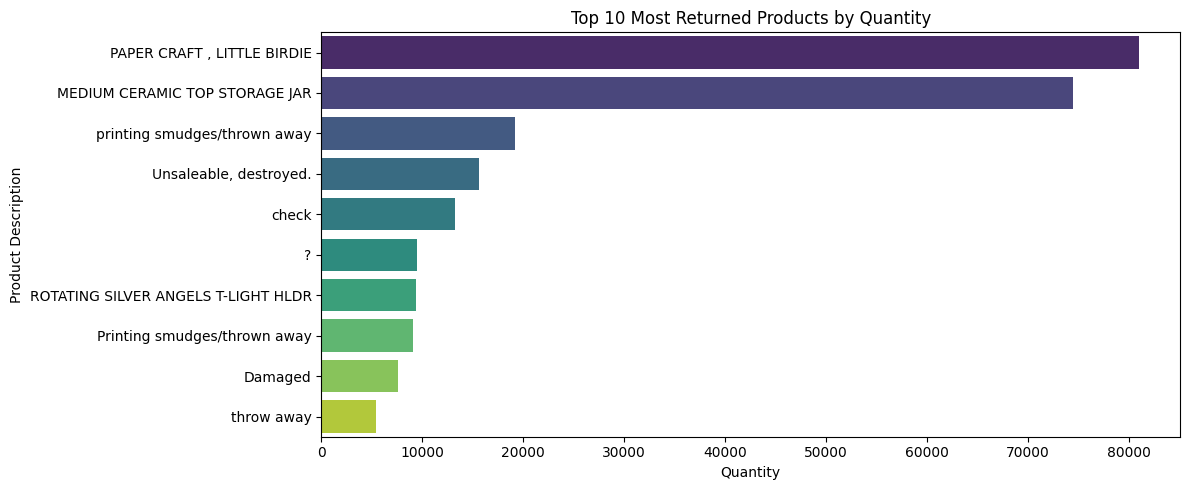

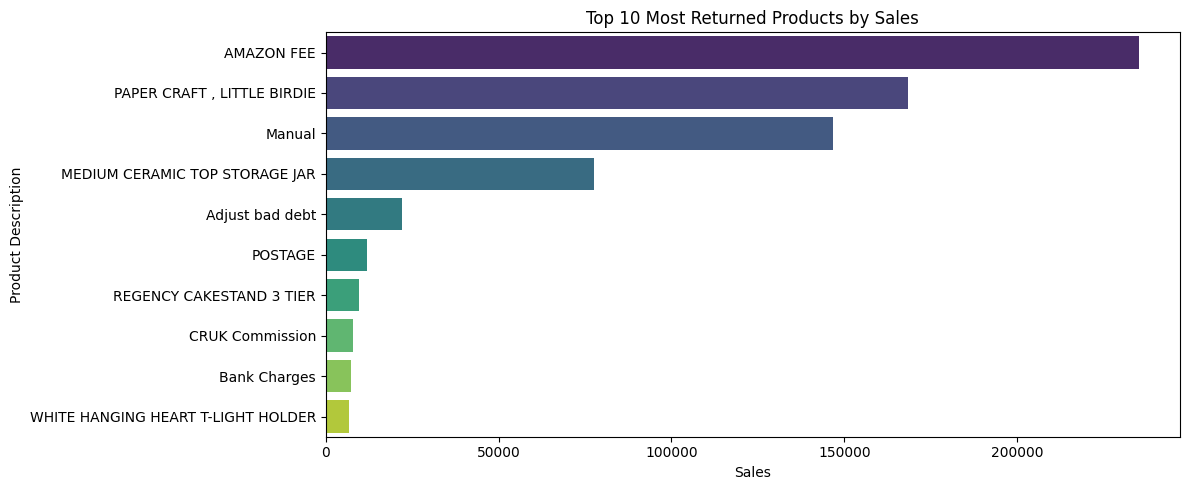

In [ ]:
# Visualize best-selling products by quantity
plt.figure(figsize=(12, 5))
sns.barplot(x='Quantity', y='Description', data=product_quantity.head(10), palette='viridis')
plt.title('Top 10 Best-Selling Products by Quantity')
plt.xlabel('Quantity')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

# Visualize best-selling products by sales
plt.figure(figsize=(12, 5))
sns.barplot(x='Sales', y='Description', data=product_sales.head(10), palette='viridis')
plt.title('Top 10 Best-Selling Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

# Visualize most returned products by quantity (assuming negative quantity indicates return)
# Filter for returned items and sum the absolute quantity
product_returned_quantity = data[data['Quantity'] < 0].groupby('Description')['Quantity'].sum().abs().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 5))
sns.barplot(x='Quantity', y='Description', data=product_returned_quantity.head(10), palette='viridis')
plt.title('Top 10 Most Returned Products by Quantity')
plt.xlabel('Quantity')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

# Visualize most returned products by sales (assuming negative sales indicates return)
# Filter for returned items and sum the absolute sales
product_returned_sales = data[data['Sales'] < 0].groupby('Description')['Sales'].sum().abs().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 5))
sns.barplot(x='Sales', y='Description', data=product_returned_sales.head(10), palette='viridis')
plt.title('Top 10 Most Returned Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

### Summary
Observation:
- Sales revenue and sales volume tend to increase in the last six months of the year, especially from August to December.
- The trend of sales revenue and sales volume shows a positive linear relationship, meaning that as sales volume increases, revenue also rises.
- The company had a presence in 38 countries, but in 2011, sales primarily came from the UK market.
- The majority of customers have low recency, frequency, and monetary values, suggesting a large number of one-time or infrequent buyers.
- The best-selling products by quantity and sales are different, indicating some products are high-volume but low-value, and vice versa.
- There are specific products with high return rates, which might indicate quality issues or misleading descriptions.

Insight:
- Because the company mainly sells unique all-occasion gifts. So, this is a seasonal effect (e.g., Thanksgiving, Black Friday, Christmas, New Year’s Day) and online shopping demand is typically higher at the end of the year.
- Despite having a presence in 38 countries, the company remains heavily reliant on its domestic market. This indicates underperformance or limited market penetration in international markets, suggesting that the company’s growth strategy is still predominantly domestic-focused.
- The RFM analysis highlights the need for strategies to increase customer frequency and monetary value, possibly through loyalty programs or targeted marketing.
- Analyzing product performance reveals opportunities to optimize inventory, marketing, and product development based on sales and return patterns. High return rates for certain products warrant further investigation into their quality or description.

Recommendation:
- Increase marketing budgets and stock levels for peak months; focus on best-selling products during the year-end season.
- Recommendation about Market Expansion Strategy:
1. Market Prioritization: Identify and prioritize high-potential international markets using data-driven market analysis (e.g., market size, growth rate, competitive landscape).
2. Localized Strategies: Adapt product offerings, pricing, and marketing campaigns to fit local customer preferences and cultural nuances.
3. Partnership & Distribution: Build strategic partnerships with local distributors, e-commerce platforms, or retailers to accelerate market penetration.
4. Brand Awareness Campaigns: Invest in targeted brand awareness initiatives in selected international markets to strengthen brand recognition.
5. Performance Tracking: Set clear KPIs for each market (revenue share, customer acquisition cost, retention rate) to evaluate and refine expansion strategies.
- Develop strategies to convert one-time buyers into repeat customers, potentially through email marketing, special offers, or loyalty programs based on RFM segmentation.
- Investigate the root causes of high return rates for specific products and take corrective actions, such as improving product quality, refining descriptions, or enhancing packaging. Consider removing consistently high-return, low-profit products.
- Optimize inventory management based on best-selling and returned product data to ensure popular items are in stock and reduce holding costs for slow-moving or high-return items.

### Summary
Observation
- In terms of value, the UK has the highest return value, but in terms of return rate, Australia, Austria, Bahrain, Belgium, and Brazil are the top five countries with the highest return rates.
- The RFM analysis shows a large number of customers with low Recency, Frequency, and Monetary values.
- Different products are top sellers by quantity versus by sales value.
- Several products exhibit high return rates by quantity and sales value, including "PAPER CRAFT , LITTLE BIRDIE," "MEDIUM CERAMIC TOP STORAGE JAR," and "AMAZON FEE."

Insight
- A high return rate reflects issues in product quality, service, or customer experience in these countries.
- The high number of low-value customers suggests a potential for growth in customer loyalty and lifetime value.
- Understanding the difference between best-selling products by quantity and sales can inform pricing and marketing strategies.
- High return rates for specific products necessitate investigation into quality control, product descriptions, or customer expectations.

Recommendation
- Further analysis should be conducted by country, product category, and seasonality to identify which groups have the highest return rates, thereby determining the root causes and prioritizing improvements.
- Implement strategies to improve customer retention and increase the frequency and monetary value of purchases for low-RFM customers.
- Develop targeted marketing campaigns for best-selling products by sales value to maximize revenue.
- Investigate the specific reasons behind high return rates for identified products and take corrective actions, potentially removing products with consistently high, unresolvable return issues.
- Optimize inventory based on both sales volume and return data to improve efficiency and reduce losses.

## Project Name: E-Commerce Performance & Customer Analytics

* **Skills & Techniques:** Data Loading & Cleaning (Pandas), Time Series Analysis, Geographic Analysis, RFM Segmentation, Product Performance Analysis, Data Visualization (Matplotlib, Seaborn).
* **Outcome:** Delivered data-driven insights and actionable recommendations for sales optimization, market strategy, customer engagement, and inventory management.